# 보스톤 주택 가격 예측

In [50]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. 데이터 탐색

In [51]:
boston = load_boston()

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fu

In [52]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [53]:
boston["feature_names"]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)


In [54]:
#dataframe

In [55]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df["PRICE"] = boston.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [56]:
#누락데이터 확인

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [58]:
#통계정보확인

In [59]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [60]:
#시각화

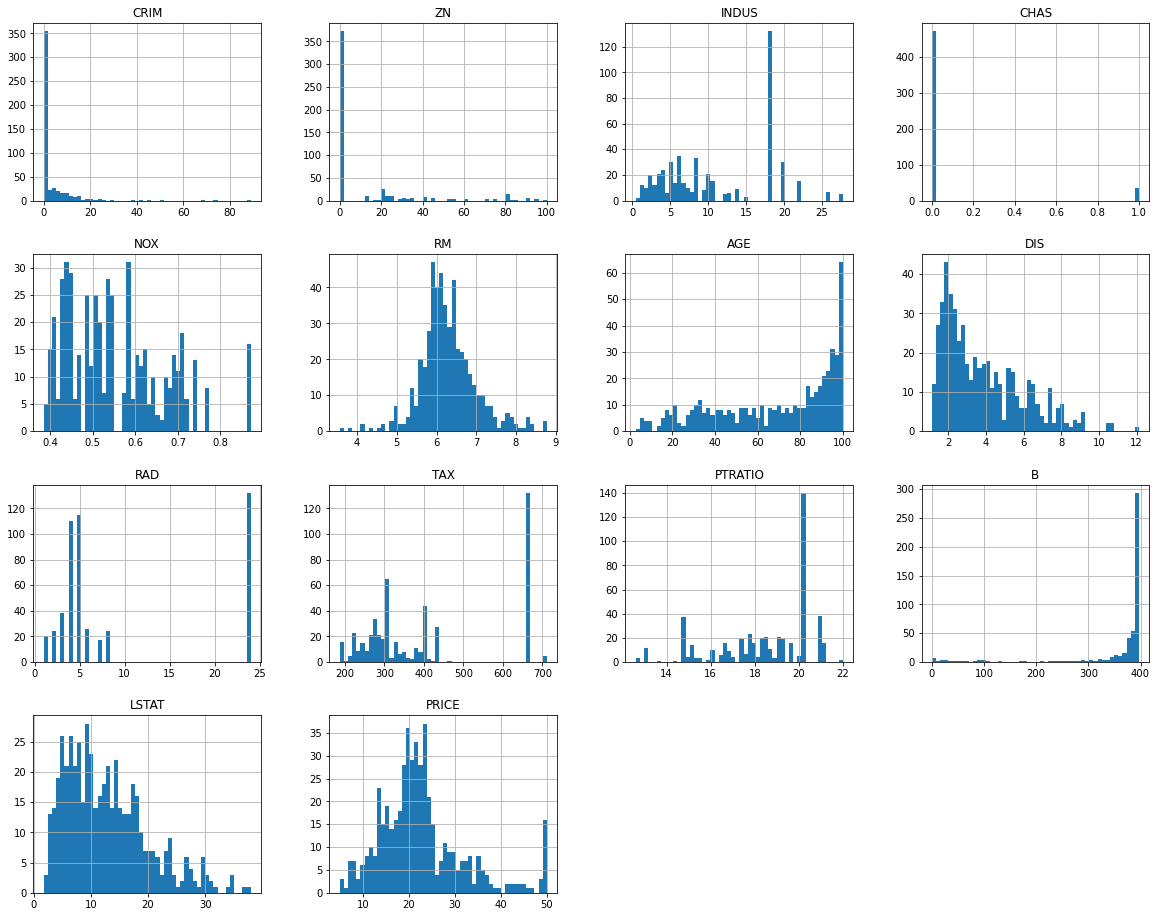

In [61]:
d=df.hist(bins=50, figsize=(20,16))

In [62]:
#상관계수

<AxesSubplot:>

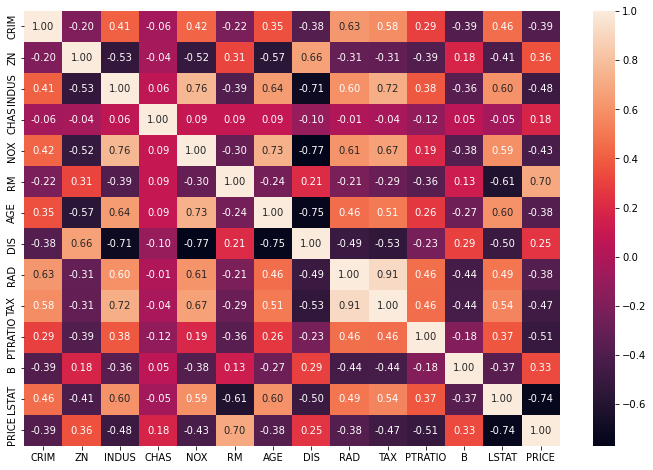

In [63]:
plt.figure(figsize=(12,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")

<AxesSubplot:xlabel='LSTAT', ylabel='PRICE'>

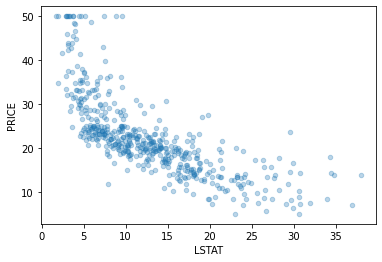

In [64]:
df.plot(kind="scatter", x="LSTAT", y="PRICE", alpha=0.3) #price와 음의 상관관계

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

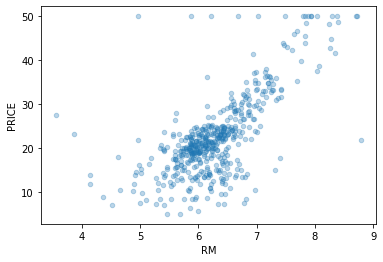

In [65]:
df.plot(kind="scatter", x="RM", y="PRICE", alpha=0.3) #price와 양의 상관관계

## 2. 데이터 준비

In [66]:
X = df.drop("PRICE", axis=1)
y = df["PRICE"]

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)

## 3. 모델 훈련

In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
# 기본 선형 모델(정규 방정식)

In [70]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

#교차검증
scores = cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
np.sqrt(-scores).mean()

4.8294930652369175

In [71]:
# 기본 선형 모델(경사 하강법)
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)

sgd_reg = SGDRegressor(penalty=None, random_state=42)

# 교차 검증
scores = cross_val_score(sgd_reg, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=5)
np.sqrt(-scores).mean()

4.8637190956813665

In [72]:
X_train_scaled.mean(), X_train_scaled.std() # 평균 0, 표준편차 1

(-9.740875280793452e-17, 1.0)

In [73]:
# 다항 회귀 모델

In [74]:
from sklearn.preprocessing import PolynomialFeatures

poly_feature = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_feature.fit_transform(X_train)
#poly_feature.transform(X_test)
X_train.shape, X_train_poly.shape

((404, 13), (404, 104))

In [75]:
#LinearRegression()
scores = cross_val_score(lin_reg, X_train_poly, y_train, scoring="neg_mean_squared_error", cv=5)
np.sqrt(-scores).mean()

4.290125232455518

In [76]:
# SGDRegressor()
# poly -> std scaling -> sgd regressor

poly_feature = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_feature.fit_transform(X_train)

std_scaler = StandardScaler()
X_train_poly_scaled = std_scaler.fit_transform(X_train_poly)

scores = cross_val_score(sgd_reg, X_train_poly_scaled, y_train, scoring="neg_mean_squared_error", cv=5)
np.sqrt(-scores).mean()

3.803171877589879

In [80]:
# SGDRegressor() with pipeline
# poly -> std scaling -> sgd regressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

poly_std_sgd_pipeline = Pipeline([
                                  ("poly", PolynomialFeatures(degree=2, include_bias=False)),
                                  ("std_scaler", StandardScaler()),
                                  ("sgd_regressor", SGDRegressor(penalty=None, random_state=42))
])

poly_std_sgd_pipeline.fit(X_train, y_train) # 교차검증에 파이프라인이 들어가지 않아서 X_train 데이터로 학습만 진행


predict = poly_std_sgd_pipeline.predict(X_test) # X_test 데이터로 성능 평가 (변환기->모델에서 제공하는 predict 사용 가능)
rmse = mean_squared_error(y_test, predict, squared=False)
rmse

3.472440359223978

In [77]:
# 규제모델

In [81]:
# 모델 파라미터 규제가 되는지 확인
# 교차 검증 사용하지 않고 진행

from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [82]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

pred = lin_reg.predict(X_test)
rmse = mean_squared_error(y_test, pred, squared=False)
rmse

4.928602182665355

In [83]:
lin_reg.intercept_, lin_reg.coef_ # 특성이 13개이므로 13개의 모델 파라미터가 도출

(30.24675099392408,
 array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
        -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
         2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
        -5.08571424e-01]))

In [84]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [85]:
lin_coef = pd.Series(lin_reg.coef_, index=X_train.columns)
lin_coef.sort_values(ascending=False)

RM          4.438835
CHAS        2.784438
RAD         0.262430
INDUS       0.040381
ZN          0.030110
B           0.012351
AGE        -0.006296
TAX        -0.010647
CRIM       -0.113056
LSTAT      -0.508571
PTRATIO    -0.915456
DIS        -1.447865
NOX       -17.202633
dtype: float64

In [86]:
alphas = [0, 0.1, 1, 10, 100]

coef_df = pd.DataFrame()
for alpha in alphas:
    ridge_reg = Ridge(alpha= alpha, random_state=42)
    ridge_reg.fit(X_train, y_train)
    ridge_coef = pd.Series(ridge_reg.coef_, index=X_train.columns)
    column = "alpha : " + str(alpha)
    coef_df[column] = ridge_coef
    
coef_df.sort_values(by="alpha : 0", ascending=False)

,alpha : 0,alpha : 0.1,alpha : 1,alpha : 10,alpha : 100
RM,4.438835,4.445779,4.464505,4.195326,2.438815
CHAS,2.784438,2.750333,2.545470,1.813291,0.550702
RAD,0.262430,0.260043,0.248882,0.248031,0.299014
INDUS,0.040381,0.034896,0.007498,-0.026277,-0.048625
ZN,0.030110,0.030459,0.032271,0.035552,0.039892
B,0.012351,0.012400,0.012642,0.012833,0.011951
AGE,-0.006296,-0.007305,-0.012191,-0.015341,0.000545
TAX,-0.010647,-0.010780,-0.011475,-0.012744,-0.014630
CRIM,-0.113056,-0.112400,-0.109234,-0.107134,-0.110765
LSTAT,-0.508571,-0.510902,-0.523833,-0.561835,-0.689539


In [87]:
alphas = [0.05, 0.1, 0.2, 0.5, 1]

coef_df = pd.DataFrame()
coef_df["no reg"] = lin_coef

for alpha in alphas:
    lasso_reg = Lasso(alpha= alpha, random_state=42)
    lasso_reg.fit(X_train, y_train)
    lasso_coef = pd.Series(lasso_reg.coef_, index=X_train.columns)
    column = "alpha : " + str(alpha)
    coef_df[column] = lasso_coef

coef_df.sort_values(by="no reg", ascending=False)    

,no reg,alpha : 0.05,alpha : 0.1,alpha : 0.2,alpha : 0.5,alpha : 1
RM,4.438835,4.443676,4.311687,4.026917,3.129886,1.630489
CHAS,2.784438,1.704029,0.919952,0.000000,0.000000,0.000000
RAD,0.262430,0.234443,0.239237,0.245289,0.236596,0.219654
INDUS,0.040381,-0.023023,-0.016785,-0.005376,-0.000000,-0.000000
ZN,0.030110,0.034602,0.034893,0.034848,0.032640,0.028501
B,0.012351,0.013035,0.013091,0.013039,0.012350,0.011181
AGE,-0.006296,-0.017338,-0.015126,-0.010294,0.000000,0.016395
TAX,-0.010647,-0.012599,-0.012962,-0.013317,-0.013032,-0.012286
CRIM,-0.113056,-0.104256,-0.104157,-0.103020,-0.093034,-0.076609
LSTAT,-0.508571,-0.549276,-0.564674,-0.590514,-0.649984,-0.747107


In [88]:
alphas = [0.05, 0.1, 0.2, 0.5, 1]

coef_df = pd.DataFrame()
coef_df["no reg"] = lin_coef

for alpha in alphas:
    elastic_reg = ElasticNet(alpha=alpha, random_state=42)
    elastic_reg.fit(X_train, y_train)
    elastic_coef = pd.Series(elastic_reg.coef_, index=X_train.columns)
    column = "alpha : " + str(alpha)
    coef_df[column] = elastic_coef

coef_df.sort_values(by="no reg", ascending=False)   

,no reg,alpha : 0.05,alpha : 0.1,alpha : 0.2,alpha : 0.5,alpha : 1
RM,4.438835,4.134773,3.764341,3.160552,2.051658,1.162996
CHAS,2.784438,1.521003,0.977221,0.404020,0.000000,0.000000
RAD,0.262430,0.247966,0.258443,0.273963,0.287364,0.275980
INDUS,0.040381,-0.027025,-0.030900,-0.031594,-0.030560,-0.020130
ZN,0.030110,0.035809,0.037015,0.038071,0.037961,0.035571
B,0.012351,0.012867,0.012746,0.012439,0.011721,0.011013
AGE,-0.006296,-0.014885,-0.011703,-0.005211,0.006508,0.018591
TAX,-0.010647,-0.012941,-0.013479,-0.014028,-0.014505,-0.014273
CRIM,-0.113056,-0.106450,-0.106853,-0.107092,-0.103047,-0.093299
LSTAT,-0.508571,-0.569848,-0.600051,-0.644219,-0.719262,-0.775576
